<a href="https://colab.research.google.com/github/iami0npkr/Story/blob/main/Zipfs_law.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Mounting Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Step 2: Installing Required Libraries
Install the necessary libraries for text processing, stopword removal, lemmatization, and more.

In [2]:
!pip install nltk scikit-learn spacy matplotlib


Step 3: Importing Libraries and Downloading Necessary Resources
Now, we need to import libraries and download the required resources for text processing.*italicized text*

In [3]:
import os
import re
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import nltk
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
import matplotlib.pyplot as plt

# Downloading necessary NLTK and spaCy data
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("averaged_perceptron_tagger")
!python -m spacy download en_core_web_sm

# Initializing tools
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
nlp = spacy.load("en_core_web_sm")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 83.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [4]:
import spacy

# After restarting, loading the English model again
nlp = spacy.load('en_core_web_sm')


Step 4: Pre-processing Function
Create a function to clean and preprocess the text data

In [5]:
def preprocess_text(text):
    # Converting to lowercase
    text = text.lower()
    # Removing non-alphanumeric characters (digits, punctuation, etc.)
    text = re.sub(r"[^a-z\s]", "", text)
    # Tokenising (split into words)
    words = text.split()
    # Removing stop words
    filtered_words = [word for word in words if word not in stop_words]
    # Lemmatising words
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
    return lemmatized_words

Step 5: Extracting Noun Phrases (Optional)
We can optionally extract multi-word noun phrases using spaCy's noun chunking feature.

In [6]:
def extract_phrases(text):
    # Using spaCy to detect noun chunks (phrases)
    doc = nlp(text)
    phrases = [" ".join(chunk.text.split()) for chunk in doc.noun_chunks]
    return phrases


Step 6: Processing All Documents in the atleisure Folder
This part processes all the documents in the atleisure folder on Google Drive, extracting the <TEXT> portion and applying the pre-processing steps.

In [7]:
documents = []
folder_path = "/content/drive/MyDrive/atleisure"

# Looping through each file in the 'atleisure' folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".utf8"):
        with open(os.path.join(folder_path, file_name), "r", encoding="utf8") as f:
            content = f.read()
            # Extracting text from <TEXT> tags
            match = re.search(r"<TEXT>(.*?)</TEXT>", content, re.DOTALL)
            if match:
                raw_text = match.group(1)
                # Preprocessing text (convert to lowercase, remove stopwords, lemmatize)
                processed_words = preprocess_text(raw_text)
                processed_text = " ".join(processed_words)
                documents.append(processed_text)


Step 7: Calculating Word Frequency and Zipf’s Law

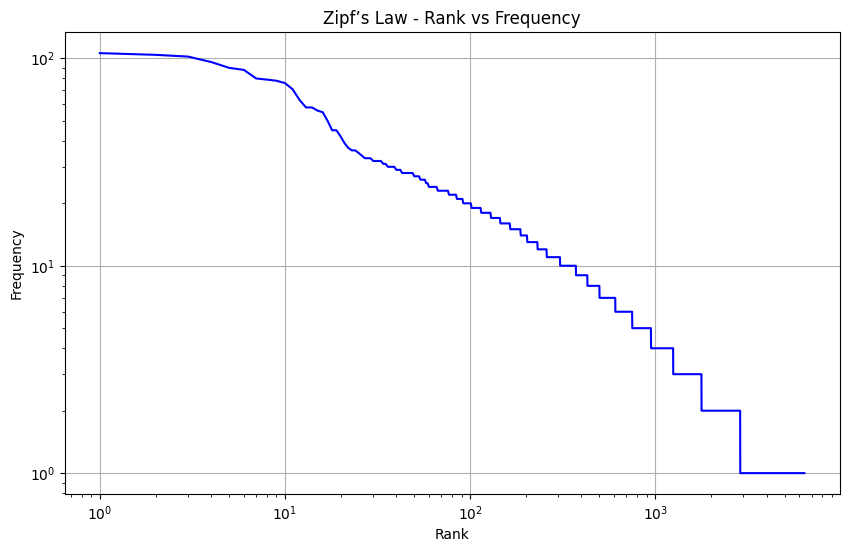

In [8]:
# Step 7: Calculating word frequency
word_freq = Counter()
for doc in documents:
    words = doc.split()
    word_freq.update(words)

# Step 8: Sorting words by frequency
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# Step 9: Plotting Zipf's Law (Rank vs Frequency)
ranks = range(1, len(sorted_word_freq) + 1)
frequencies = [freq for _, freq in sorted_word_freq]

plt.figure(figsize=(10, 6))
plt.plot(ranks, frequencies, 'b-', label='Word Frequency')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Zipf’s Law - Rank vs Frequency')
plt.grid(True)
plt.show()

In [9]:
!pip install pandas


In [11]:
import pandas as pd

# Converting the word frequency data (Counter object) into a pandas DataFrame
word_freq_df = pd.DataFrame(sorted_word_freq, columns=['Word', 'Frequency'])

# Sorting the DataFrame by frequency in descending order
word_freq_df_sorted = word_freq_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# Displaying the sorted DataFrame
word_freq_df_sorted.head(2000)


,Word,Frequency
0,december,106
1,telegraph,104
2,calcutta,102
3,said,96
4,one,90
...,...,...
1995,contended,2
1996,landlord,2
1997,pendency,2
1998,union,2
